## SVM for Regression

This Support Vector Machine (SVM) method for regression is applied to analyze the "Power consumption of Tetouan City" dataset. This dataset includes various attributes such as DateTime, Temperature, Humidity, Wind Speed, general diffuse flows, diffuse flows, and power consumption data in three different distribution zones in Tetouan, Northern Morocco.

In [57]:
# Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Load the dataset
data = pd.read_csv("dataset.csv")

data = data.sample(500).reset_index(drop=True) # display random samples based on filters
data = data.drop('DateTime', axis=1)

# define the target column
target_column = 'Zone 1 Power Consumption'

# separate features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,18.987924,67.021520,1.864476,173.078878,79.732504,32652.159043,21344.463732,18098.493795
std,5.686372,16.091615,2.326431,247.209647,135.270968,6977.029521,5349.571905,6720.187203
min,4.172000,11.340000,0.065000,0.011000,0.041000,19360.677970,10920.731710,7490.996399
25%,14.692500,56.527500,0.075000,0.065000,0.119000,27092.030710,16985.570202,13542.716522
50%,19.010000,69.040000,0.084000,9.990000,8.405000,32467.692305,21077.154715,16557.492920
75%,22.780000,80.225000,4.914000,301.125000,104.300000,37061.385235,24871.716357,21579.790645
max,39.760000,93.100000,4.947000,920.000000,764.000000,51208.504980,35114.255540,47598.326360


In [59]:
data.isnull().sum() # check to see the number of null data

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

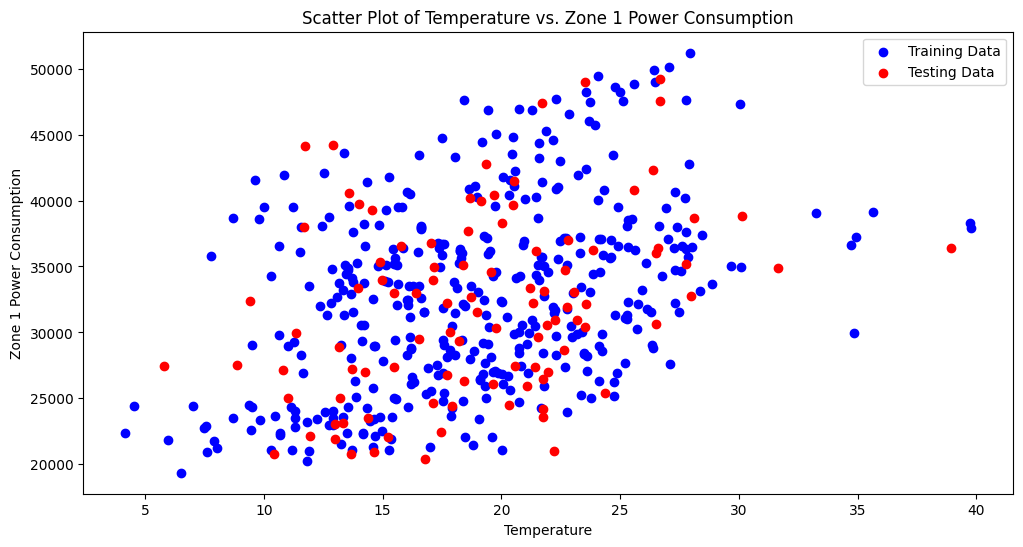

In [60]:
# visualize the data
plt.figure(figsize=(12, 6))

# plot the training data
plt.scatter(X_train['Temperature'], y_train, color='blue', label='Training Data')

# plot the testing data
plt.scatter(X_test['Temperature'], y_test, color='red', label='Testing Data')

plt.xlabel('Temperature')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Scatter Plot of Temperature vs. Zone 1 Power Consumption')
plt.legend()
plt.show()

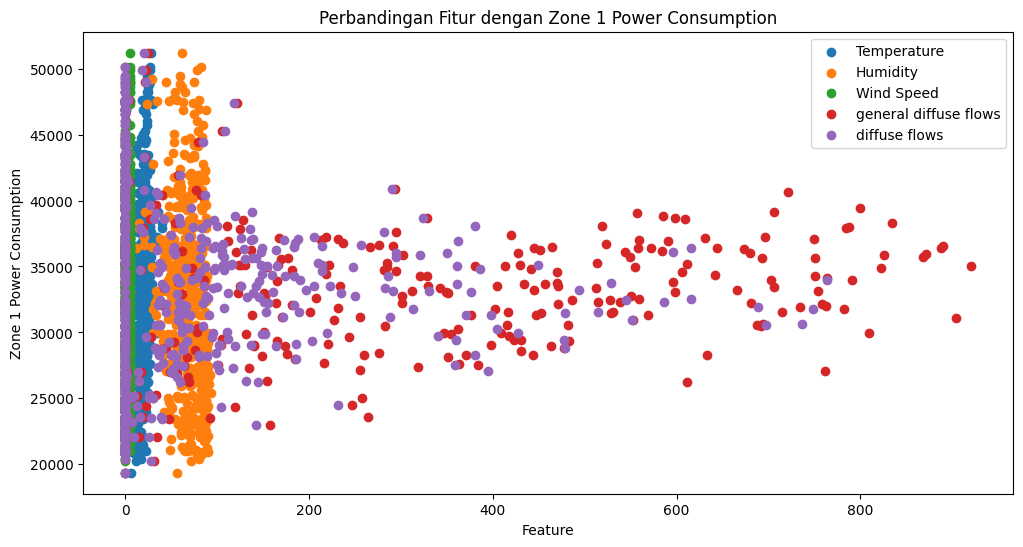

In [61]:
# visualize the data

plt.figure(figsize=(12, 6))

for feature in data.columns[:-3]:  # exclude the last column (target)
    plt.scatter(data[feature], data['Zone 1 Power Consumption'], label=feature)

plt.xlabel('Feature')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Perbandingan Fitur dengan Zone 1 Power Consumption')
plt.legend()
plt.show()

In [62]:
# Baseline Model dan Model Exploration (at least 3 scheme)

#Model 1 - Linear
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test) #checking predict dari model


#Model 2 - RBF
model_rbf = SVR(kernel='rbf') #baseline
param_grid = [
    {'C': [0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01]}
]

grid_search = GridSearchCV(model_rbf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
model_rbf = grid_search.best_estimator_

model_rbf.fit(X_train_scaled, y_train) # Training the model
y_pred_rbf = model_rbf.predict(X_test_scaled) # Make predictions


#Model 3 - Polynom
model_poly = SVR(kernel='poly',degree=3) #baseline
param_grid = [
    {'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]}
]

grid_search = GridSearchCV(model_poly, param_grid, cv=2)
grid_search.fit(X_train_scaled, y_train)
model_poly = grid_search.best_estimator_

model_poly.fit(X_train_scaled, y_train) # Training the model
y_pred_poly = model_poly.predict(X_test_scaled) # Make predictions

In [63]:
# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear_dec = mse_linear / 10**8
r2_linear = r2_score(y_test, y_pred_linear)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mse_rbf_dec = mse_rbf / 10**8
r2_rbf = r2_score(y_test, y_pred_rbf)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_poly_dec = mse_poly / 10**8
r2_poly = r2_score(y_test, y_pred_poly)

print("Model with Kernel Linear:")
print(f"Mean Squared Error (MSE) :{mse_linear_dec:.9f}")
print("R-squared (R2) Score:", r2_linear)

print("\nModel with Kernel RBF:")
print(f"Mean Squared Error (MSE) :{mse_rbf_dec:.9f}")
print("R-squared (R2) Score:", r2_rbf)

print("\nModel with Kernel Polynom:")
print(f"Mean Squared Error (MSE) :{mse_poly_dec:.9f}")
print("R-squared (R2) Score:", r2_poly)

Model with Kernel Linear:
Mean Squared Error (MSE) :0.069307110
R-squared (R2) Score: 0.8539556435963801

Model with Kernel RBF:
Mean Squared Error (MSE) :0.228311695
R-squared (R2) Score: 0.5189002293371092

Model with Kernel Polynom:
Mean Squared Error (MSE) :0.138398865
R-squared (R2) Score: 0.708365084151731


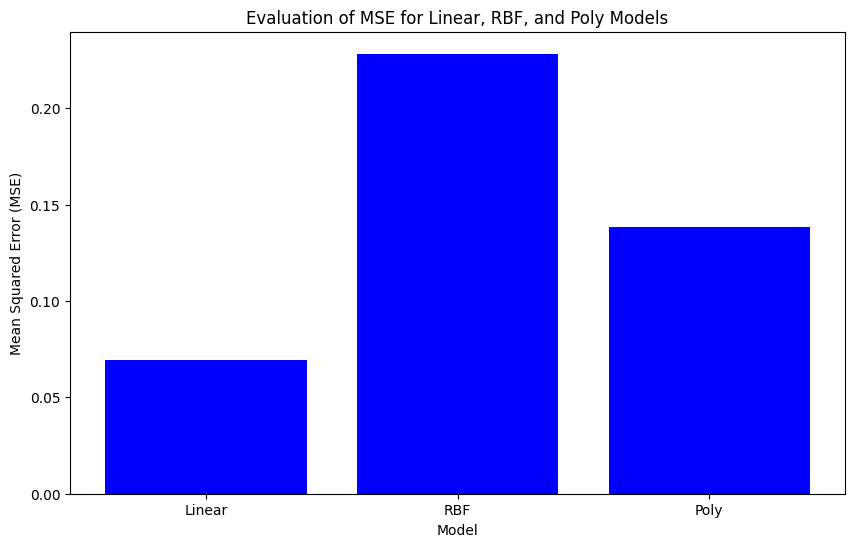

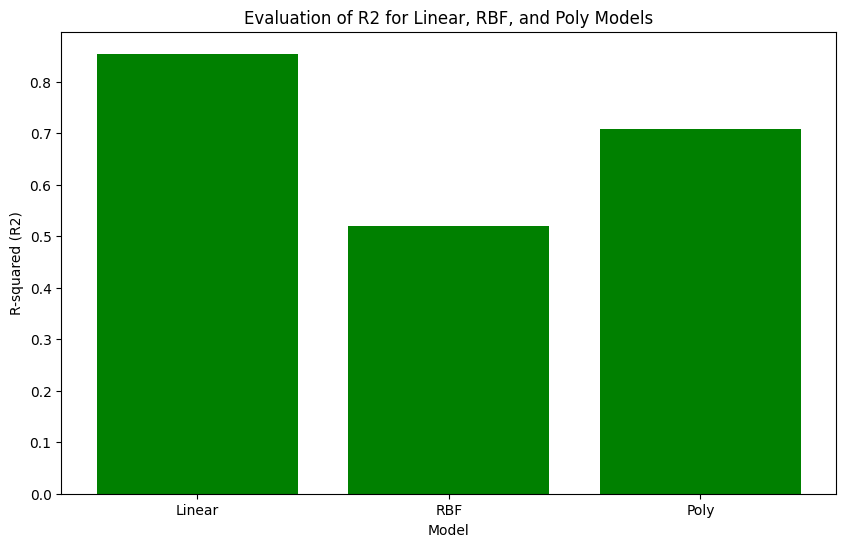

In [64]:
# obtain MSE (Mean Squared Error) and R2 (R-squared) results for the tested models
mse_values = [mse_linear_dec, mse_rbf_dec, mse_poly_dec]
r2_values = [r2_linear, r2_rbf, r2_poly]
model_names = ['Linear', 'RBF', 'Poly']

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='b')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evaluation of MSE for Linear, RBF, and Poly Models')
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='g')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Evaluation of R2 for Linear, RBF, and Poly Models')
plt.show()